In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from utils import *
plt.rcParams['text.usetex'] = False


$$ \tau \frac{dV}{dt} = V_0 - V(t)+RI(t)$$

In [7]:
import numpy as np
from scipy.ndimage import binary_dilation

def LIFNeuron(prm):
    t, V = LIF(prm)
    I_out = np.zeros(len(V))

    # Pulse generation parameters
    spike_indices = np.where(V >= -56)[0] + prm['delta_t']
    width = prm.get('width', 50)  # original square pulse width
    amp = prm['OutA']

    # Create square pulses of fixed width
    for idx in spike_indices:
        start = max(idx, 0)
        end = min(idx + width, len(I_out))
        I_out[start:end] = amp

    # Optional: Widen the pulse using binary dilation
    widen_by = prm.get('widen_by', 0)  # widen by these many timesteps on each side

    if widen_by > 0:
        pulse_mask = I_out > 0
        widened_mask = binary_dilation(pulse_mask, structure=np.ones(widen_by * 2 + 1))
        I_out = np.zeros_like(I_out)
        I_out[widened_mask] = amp  # Keep amplitude consistent

    return t, I_out, V


In [8]:

INeuron = {
    'V0': -70,
    'Vq': -55,
    'Vinit':-70,
    'w1': 1,
    'w2': 1,
    'tau': 1, 
    'refr':300,
    't0': 0, 
    'tf': 10,
    'N':1000,
    'k':10,
    'window': 50,
    'lag':150,
    'OutA': 40,
    'delta_t': 300
}

Rout = ReceptorNeuron('I1', 'I2', INeuron['N'], INeuron['k'], INeuron['lag'], amp1=40, amp2=40, signal='window', window=INeuron['window'])
INeuron.update(Rout)
t, Iout, V_I = LIFNeuron(INeuron)
# print(INeuron)

O1Neuron = {
    'V0': -70,
    'Vq': -55,
    'Vinit':-70,
    'w1': .8,
    'w2': .8,
    'tau': 1, 
    'refr':300,
    't0': 0, 
    'tf': 10,
    'N':1000,
    'k':10,
    'window': 50,
    'lag':200,
    'I1': 0.5*Rout['I1'], # from the receptor 1
    'I2': 1.112*Iout, # from the interneuron
    'OutA': 40,
    'delta_t': 500
    }
O2Neuron = {
    'V0': -70,
    'Vq': -55,
    'Vinit':-70,
    'w1': .8,
    'w2': .8,              
    'tau': 1, 
    'refr':300,
    't0': 0, 
    'tf': 10,
    'N':1000,
    'k':10,
    'window': 50,
    'lag':200,
    'I1': 0.5*Rout['I2'],
    'I2': 1.112*Iout,
    'OutA': 40,
    'delta_t': 500
    }

t_O1, O1out, V_O1 = LIFNeuron(O1Neuron)
t_O2, O2out, V_O2 = LIFNeuron(O2Neuron)

NameError: name 'ReceptorNeuron' is not defined

In [9]:
# # testbed for neuron
# I_1 = np.zeros_like(np.linspace(0, 10, 1000))
# i = 0
# while i<900:
#     I_1[-i-1] = 20
#     i += 1
# # print(I1)

# O1Neuron = {
#     'V0': -70,
#     'Vq': -55,
#     'Vinit':-70,
#     'w1': .8,
#     'w2': .8,
#     'tau': 1, 
#     'refr':300,
#     't0': 0, 
#     'tf': 10,
#     'N':1000,
#     'k':10,
#     'window': 50,
#     'lag':500,
#     'I1': I_1,
#     'I2': Iout,
#     'OutA': 40,
#     'delta_t': 500
# }

# t_O_1,i_out, V_O_1 = LIFNeuron(O1Neuron)
# plt.plot(t_O_1, V_O_1)
# plt.plot(t_O_1, I_1)
# plt.plot(t_O_1, i_out)
# print(np.count_nonzero(I_1), np.count_nonzero(i_out))
# # o = ReceptorNeuron('I1', 'I2', INeuron['N'], INeuron['k'], INeuron['lag'], amp1=20, amp2=20, signal='window', window=INeuron['window'])
# # print(o)
# # neuron working fine

NameError: name 't_O1' is not defined

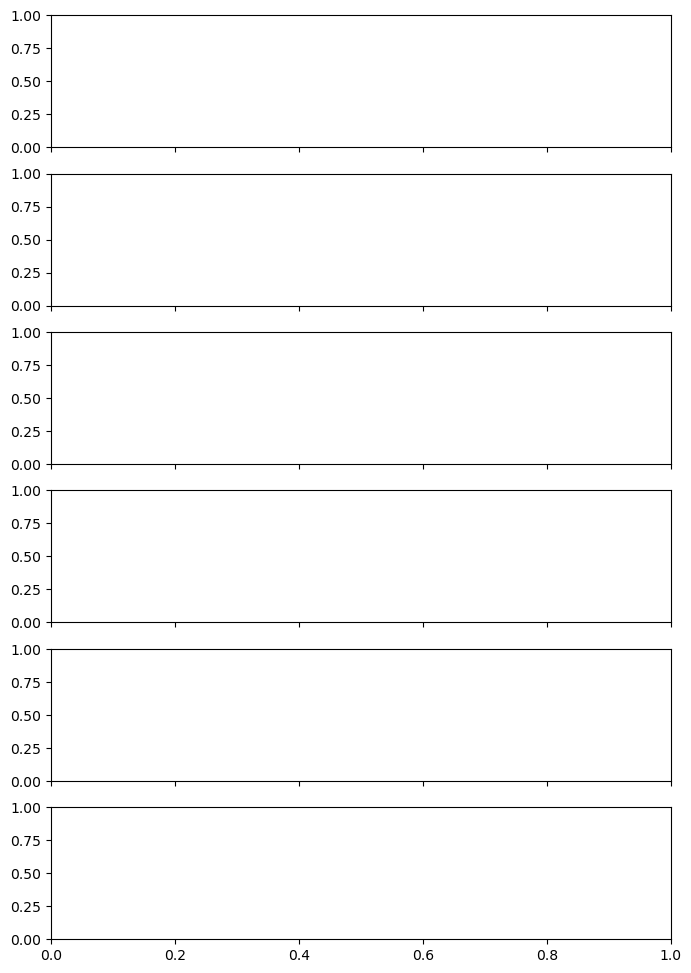

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

# Create 6 vertical subplots (6 rows, 1 column)
fig, axs = plt.subplots(6, 1, figsize=(8, 12), sharex=True)  # sharex for aligned x-axes

# Example data for each subplot

axs[0].plot(t_O1, V_I)
axs[1].plot(t_O1,1 * INeuron['I1'])
axs[1].plot(t_O1,1 * INeuron['I2'])
axs[2].plot(t_O1, V_O1)
axs[3].plot(t_O1, 1.12*Iout, label= 'I out')
axs[3].plot(t_O1, 0.5*Rout['I1'], label = 'R_1 out')
axs[3].legend()
axs[4].plot(t_O1, V_O2)
axs[5].plot(t_O1, 1.12*Iout, label = 'I out')
axs[5].plot(t_O1, 0.5*Rout['I2'], label = 'R2 out')
axs[5].legend()

titles = ["interneuron V", "interneuron Input currents", "output 1 V", "output 1 input currents", "oytput 2 V", "output 2 input currents"]

for i, ax in enumerate(axs):
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()


C:\Users\aksha\AppData\Local\Temp\ipykernel_30020\1952459572.py:14: UserWarning: Legend does not support handles for Text instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


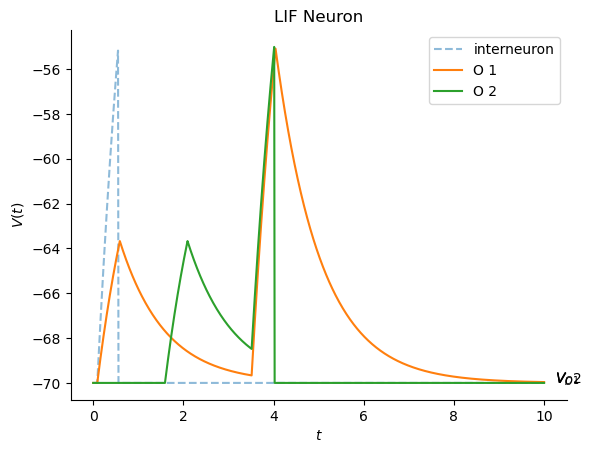

In [6]:
x_offset = .25  

plt.plot(t_O1, V_I, '--', alpha=.5, label = 'interneuron')
plt.text(t_O1[-1]+x_offset, V_I[-1], '$V_I$', ha='left')
plt.plot(t_O1, V_O1, label = 'O 1')
plt.text(t_O1[-1]+x_offset, V_O1[-1], '$V_{O1}$', ha='left', label = 'O 1')

plt.plot(t_O1, V_O2, label = 'O 2')
plt.text(t_O1[-1]+x_offset, V_O2[-1], '$V_O2$', ha='left')

plt.title('LIF Neuron')
plt.xlabel('$t$')
plt.ylabel('$V(t)$')
plt.legend()
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Time iteration:: 100%|██████████| 1000/1000 [04:08<00:00,  4.02it/s]


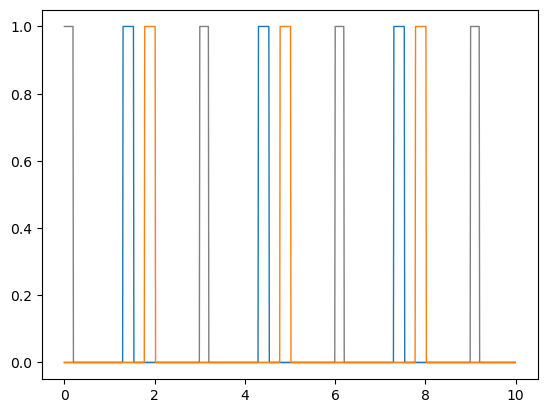

In [8]:
%run utils.py
import pandas as pd
init_params={
    'v' : 2,                    # Wave speed
    'theta_resolution' : 1,     # degrees
    'tolerance' : 0.05,         # Detection threshold
    'r_s' : 1.0,                # r of source
    'theta_s' : np.pi / 3,      # theta of source
    'd': 3,
    'r1_amp':1,
    'r2_amp':1
    }
time_params = {
    'dt' : 0.01,                # Time step
    'tmax' : 10.0,          # Simulation duration
    'period' : 3,             # Period between source emissions
    'width' : 20,
}

# Source in polar coordinates
x_s = init_params['r_s'] * np.cos(init_params['theta_s'])
y_s = init_params['r_s'] * np.sin(init_params['theta_s'])
source = np.array([x_s, y_s])
# Receptors (fixed distance from origin along a diameter)
receptor1 = np.array([ init_params['d'], 0])  # theta = 0
receptor2 = np.array([-init_params['d'], 0])  # theta = pi

init_params.update({'s_position': [x_s,y_s],
                    'r1_position': receptor1,
                    'r2_position': receptor2
                    })

# Time array and output signals
time = np.arange(0, time_params['tmax'], time_params['dt'])
Rout1 = np.zeros_like(time)
Rout2 = np.zeros_like(time)
# emission, Sout = PeriodicEmission(time_params['tmax'], time_params['period'], time_params['dt'])


emission, Sout = PeriodicEmissionW(time, time_params)
# Create a pandas DataFrame with the signals
df = pd.DataFrame({
    'time': time,
    'Sout': Sout,
    'Rout1': Rout1,
    'Rout2': Rout2
})

df2 = SimulateTime(df, emission, init_params)

plt.plot(df2['time'], df2['Sout'], color='grey', linewidth=1)
plt.plot(df2['time'], df2['Rout1'],linewidth=1)
plt.plot(df2['time'], df2['Rout2'],linewidth=1)   

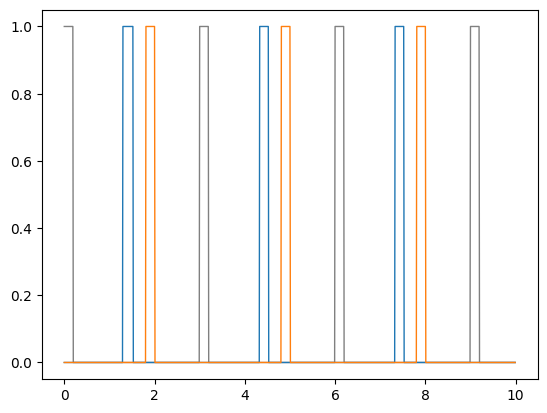

In [16]:

%run utils.py
df3 = SimulateTime2(df, emission, init_params)

plt.plot(df3['time'], df3['Sout'], color='grey', linewidth=1)
plt.plot(df3['time'], df3['Rout1'],linewidth=1)
plt.plot(df3['time'], df3['Rout2'],linewidth=1)   